In [1]:
# Loading Librarieimport pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import cross_val_score, cross_val_predict

In [4]:
# importing the dataset
shipset = pd.read_csv("/Users/rakshitmadan/Desktop/STAT 610/Case Study/Shipment GT.csv")

In [5]:
# Dropping SaleDate Column
shipset = shipset.drop('SaleDate', axis=1)

In [6]:
shipset.rename(columns={"Age at Sale (Years)": "Age_at_Sale"},inplace = True) ; shipset

,Vessel,Price,YearBuilt,Age at Sale,DWT,Capesize,FuelPrice,Gross Tonnage
0,Lowlands Beilun,73.0,1999,8,170.2,4647,2.300,85906.00000
1,CHS Moon,45.0,1991,16,150.2,4647,2.300,89659.00000
2,Spring Brave,62.0,1995,12,151.1,4647,2.300,77298.00000
3,Martha Verity,60.0,1995,12,158.0,4647,2.300,79855.00000
4,TMT TBN,61.3,1993,14,174.7,4647,2.300,79934.68085
5,Pantelis SP,83.0,1999,8,169.9,4878,2.463,88385.00000
6,Amazon,45.0,1990,17,149.5,4878,2.463,77096.00000
7,Cape Kassos,100.0,2004,3,170.0,5245,2.640,87440.00000
8,Johnny K,65.0,1994,13,165.3,5245,2.640,91651.00000
9,Zorbas,70.0,1996,11,165.1,5245,2.640,91657.00000


In [5]:
# Mean, Standard Deviation and other metrics
shipset.describe()

,Price,YearBuilt,Age_at_Sale,DWT,Capesize,Month,Kyu Btau,GT
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,72.979167,1992.916667,14.270833,158.935417,7643.708333,5.312500,79899.986979,79.908333
std,33.893757,6.330720,6.330405,17.650984,2499.309368,3.543987,13280.423761,13.276116
min,22.000000,1981.000000,3.000000,98.400000,4647.000000,1.000000,32672.000000,32.700000
25%,46.500000,1987.750000,10.750000,149.275000,5245.000000,3.000000,77160.500000,77.175000
50%,66.000000,1994.000000,13.000000,161.450000,6799.000000,4.000000,80239.500000,80.250000
75%,88.500000,1996.250000,20.000000,170.125000,9663.000000,8.250000,87440.000000,87.400000
max,158.000000,2004.000000,26.000000,207.100000,12479.000000,12.000000,110779.000000,110.800000


In [6]:
##Distribution of the variables

Text(0.5, 1.0, 'Price Distribution')

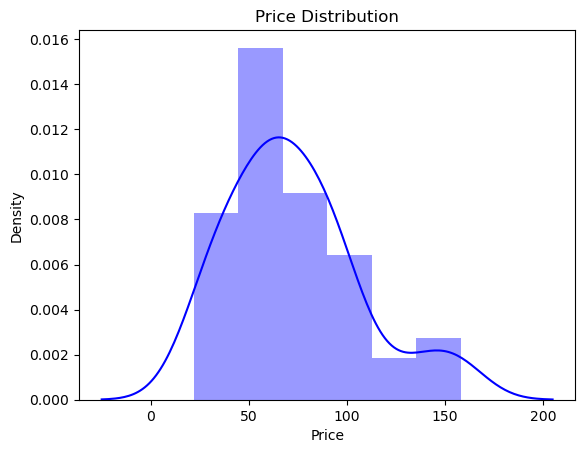

In [7]:
sns.distplot(shipset['Price'], color = 'blue')
plt.title("Price Distribution")

Text(0.5, 1.0, 'DWT Distribution')

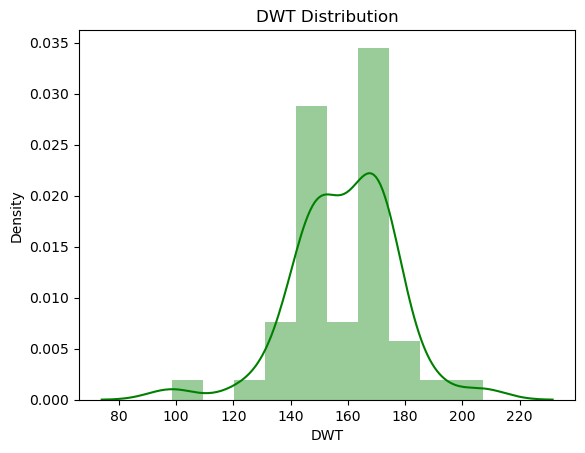

In [8]:
sns.distplot(shipset['DWT'], color = 'green')
plt.title("DWT Distribution")

Text(0.5, 1.0, 'Age at Sale Distribution')

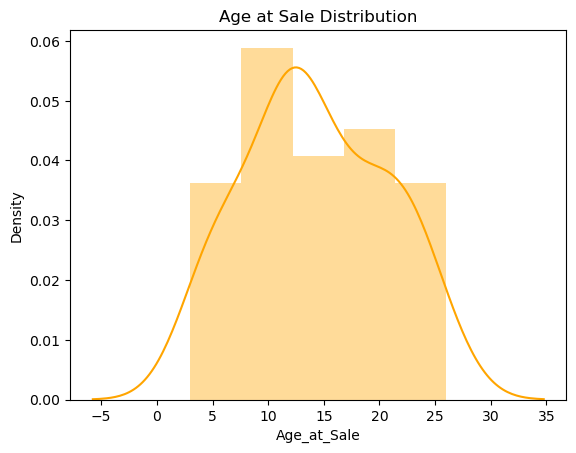

In [9]:
sns.distplot(shipset['Age_at_Sale'], color = 'orange')
plt.title("Age at Sale Distribution")

Text(0.5, 1.0, 'GT Distribution')

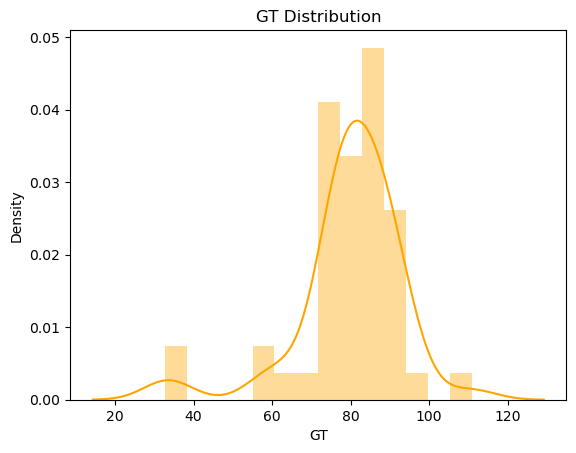

In [10]:
sns.distplot(shipset['GT'], color = 'orange')
plt.title("GT Distribution")

Text(0.5, 1.0, 'Capesize Distribution')

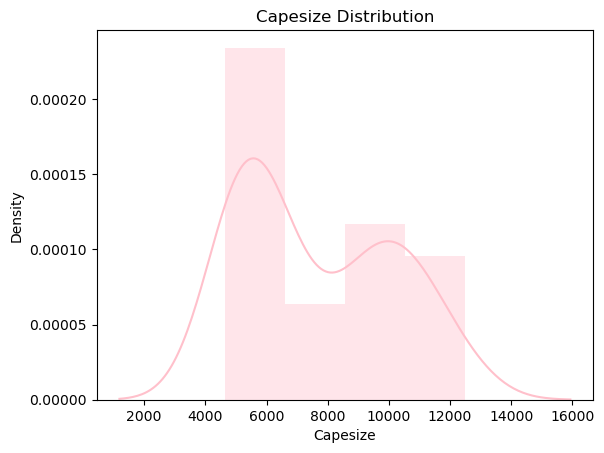

In [11]:
sns.distplot(shipset['Capesize'], color = 'pink')
plt.title("Capesize Distribution")

In [12]:
# Relationship between the variables

Text(0.5, 1.0, 'Age_at_Sale vs Price')

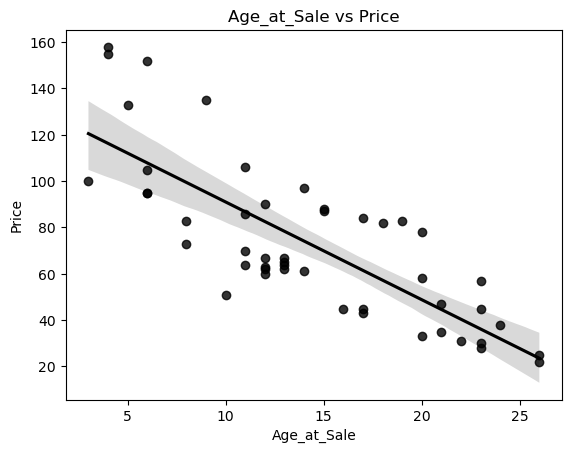

In [13]:
# Age at sale and Price
sns.regplot(x = shipset['Age_at_Sale'], y = shipset['Price'],marker = 'o', color = 'black')
plt.title('Age_at_Sale vs Price')
# Negative correlation between price and age at sale

Text(0.5, 1.0, 'GT vs Price')

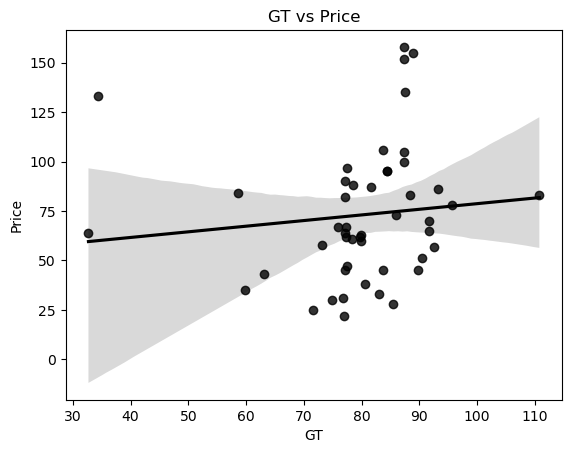

In [14]:
# Age at sale and Price
sns.regplot(x = shipset['GT'], y = shipset['Price'],marker = 'o', color = 'black')
plt.title('GT vs Price')
# Negative correlation between price and age at sale

Text(0.5, 1.0, 'Capesize vs Price')

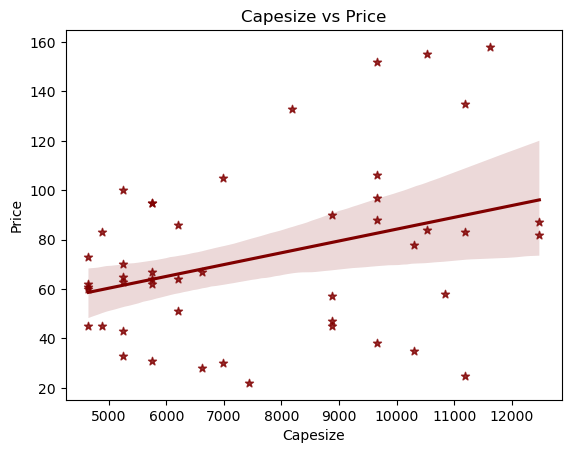

In [15]:
# Capesize and Price
sns.regplot(x = shipset['Capesize'], y = shipset['Price'],marker = '*', color = 'maroon')
plt.title('Capesize vs Price')

Text(0.5, 1.0, 'DWT vs Price')

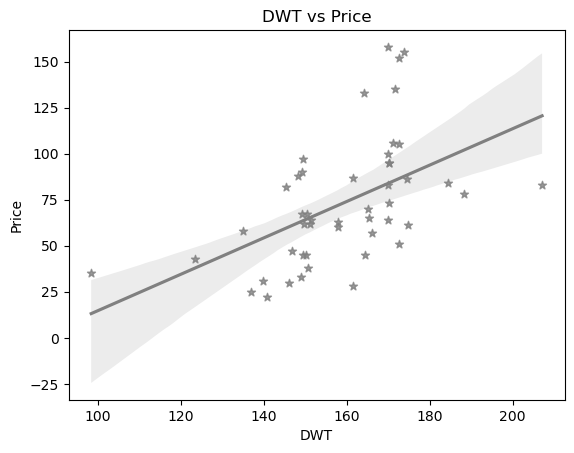

In [16]:
# DWT and Price
sns.regplot(x = shipset['DWT'], y = shipset['Price'],marker = '*', color = 'grey')
plt.title('DWT vs Price')

Text(0.5, 1.0, 'Yearbuilt vs Price')

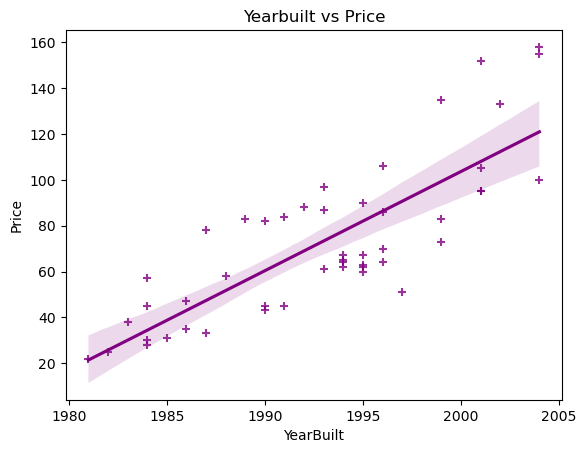

In [17]:
# Year Built and Price
sns.regplot(x = shipset['YearBuilt'], y = shipset['Price'],marker = '+', color = 'purple')
plt.title('Yearbuilt vs Price')

In [18]:
# Correlation Matrix and VIF

In [19]:
# Select specific columns for correlation
selected_columns = ['Price','YearBuilt','Age_at_Sale', 'DWT','Capesize','Month']

# Create a subset DataFrame with the selected columns
shipset_subset = shipset[selected_columns]

#Correlation
shipset_subset.corr()

,Price,YearBuilt,Age_at_Sale,DWT,Capesize,Month
Price,1.000000,0.808430,-0.787627,0.514754,0.352472,0.038315
YearBuilt,0.808430,1.000000,-0.998059,0.441826,-0.172633,-0.282364
Age_at_Sale,-0.787627,-0.998059,1.000000,-0.431264,0.217360,0.262640
DWT,0.514754,0.441826,-0.431264,1.000000,0.042766,-0.160653
Capesize,0.352472,-0.172633,0.217360,0.042766,1.000000,0.427984
Month,0.038315,-0.282364,0.262640,-0.160653,0.427984,1.000000


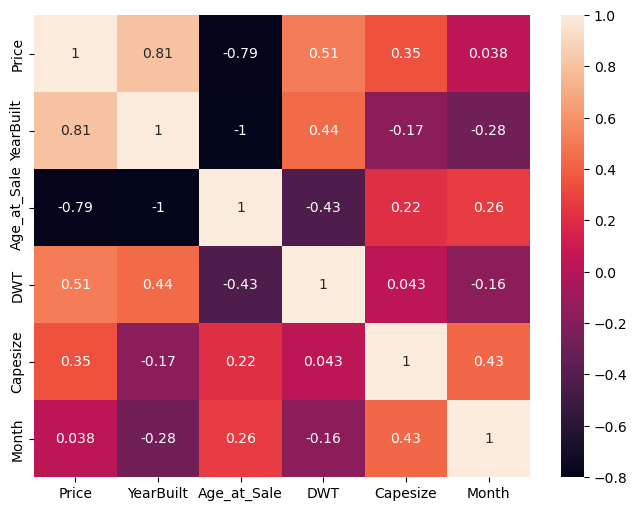

In [20]:
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(shipset_subset.corr(),vmin=-0.8, annot=True,ax=ax);

In [21]:
# VIF between Price and Other variables

In [22]:
Y, X = dmatrices('Price ~ DWT+Age_at_Sale+Capesize', data=shipset, return_type='dataframe')

In [23]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns ; vif

,VIF,variable
0,131.944976,Intercept
1,1.258727,DWT
2,1.318729,Age_at_Sale
3,1.075427,Capesize


In [24]:
# Linear Regression without Standardization

In [25]:
shipset_regression = shipset[["Age_at_Sale",'DWT',"Capesize","Price"]].copy() ; shipset_regression_results = shipset[["Age_at_Sale",'DWT',"Capesize","Price"]].copy()

In [26]:
X = shipset_regression.values[:,:-1] ; Y = shipset_regression.values[:,-1]

In [27]:
LinearReg1 = LinearRegression().fit(X,Y)

In [28]:
m = LinearReg1.coef_.flatten() ; b = LinearReg1.intercept_.flatten()

In [29]:
print("m = {0}".format(m)) ; print("b = {0}".format(b))

m = [-4.54491661  0.24182468  0.00720909]
b = [44.30020712]


In [30]:
LinearReg1_Y_predicted = LinearReg1.predict(X)

In [31]:
shipset_regression_results['LinearReg1_Y_predicted'] = LinearReg1_Y_predicted

In [32]:
shipset_regression_results

,Age_at_Sale,DWT,Capesize,Price,LinearReg1_Y_predicted
0,8,170.2,4647,73,82.600088
1,16,150.2,4647,45,41.404262
2,12,151.1,4647,62,59.801570
3,12,158.0,4647,60,61.470161
4,14,174.7,4647,61,56.418800
5,8,169.9,4878,83,84.192841
6,17,149.5,4878,45,38.355368
7,3,170.0,5245,100,109.587344
8,13,165.3,5245,65,63.001601
9,11,165.1,5245,70,72.043070


In [33]:
residuals_LinearReg1 = Y - LinearReg1_Y_predicted

In [34]:
shipset_regression_results['LinearReg1 Residuals'] = residuals_LinearReg1

In [35]:
r_squared_LinearReg1 =  LinearReg1.score(X, Y) ; print(r_squared_LinearReg1)

0.9207860249524997


In [36]:
print(mean_absolute_error(Y, LinearReg1_Y_predicted))

6.866188070245531


In [37]:
print(mean_squared_error(Y, LinearReg1_Y_predicted))

89.10413550934443


In [38]:
# Residual Plot for Linear Regression with Standardization

(-75.0, 75.0)

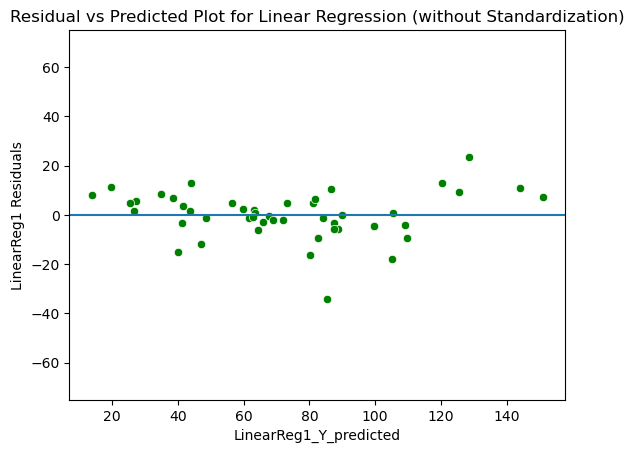

In [39]:
sns.scatterplot(data = shipset_regression_results, x = 'LinearReg1_Y_predicted' , y = 'LinearReg1 Residuals', color = 'green')
plt.title("Residual vs Predicted Plot for Linear Regression (without Standardization)")
plt.axhline(y=0)
plt.ylim(-75,75)

Text(0.5, 0, 'Residuals')

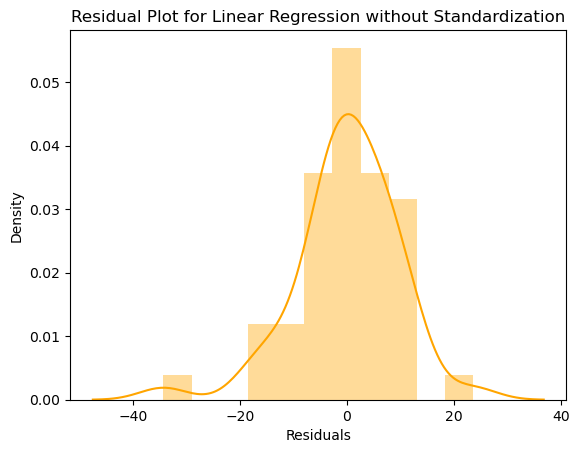

In [40]:
sns.distplot(residuals_LinearReg1, color = 'orange')
plt.title("Residual Plot for Linear Regression without Standardization")
plt.xlabel("Residuals")

In [41]:
# Cross Validation of Linear Regression without Standardization

In [42]:
scores = cross_val_score(LinearReg1, X, Y, cv=5)
print ("Cross-validated scores:", scores.mean())

Cross-validated scores: 0.8718339765999591


In [43]:
# Ordinary Least Squares on Non-Standardized Dataset

In [44]:
X = sm.add_constant(X)

In [45]:
ols1 = sm.OLS(Y, X).fit()

In [46]:
ols1_predictions = ols1.predict(X)

In [47]:
shipset_regression_results['OLS1_Y_predicted'] = ols1_predictions
shipset_regression_results['OLS1_Residuals'] = ols1.resid ; print(ols1.resid.mean())

2.119637798614349e-12


In [48]:
print(mean_absolute_error(Y, ols1_predictions))

6.866188070245655


In [49]:
print(mean_squared_error(Y, ols1_predictions))

89.10413550934443


In [50]:
shipset_regression_results

,Age_at_Sale,DWT,Capesize,Price,LinearReg1_Y_predicted,LinearReg1 Residuals,OLS1_Y_predicted,OLS1_Residuals
0,8,170.2,4647,73,82.600088,-9.600088,82.600088,-9.600088
1,16,150.2,4647,45,41.404262,3.595738,41.404262,3.595738
2,12,151.1,4647,62,59.801570,2.198430,59.801570,2.198430
3,12,158.0,4647,60,61.470161,-1.470161,61.470161,-1.470161
4,14,174.7,4647,61,56.418800,4.581200,56.418800,4.581200
5,8,169.9,4878,83,84.192841,-1.192841,84.192841,-1.192841
6,17,149.5,4878,45,38.355368,6.644632,38.355368,6.644632
7,3,170.0,5245,100,109.587344,-9.587344,109.587344,-9.587344
8,13,165.3,5245,65,63.001601,1.998399,63.001601,1.998399
9,11,165.1,5245,70,72.043070,-2.043070,72.043070,-2.043070


In [51]:
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     170.5
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           3.07e-24
Time:                        16:50:22   Log-Likelihood:                -175.86
No. Observations:                  48   AIC:                             359.7
Df Residuals:                      44   BIC:                             367.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.3002     16.346      2.710      0.010      11.356      77.244
x1            -4.5449      0.261    -17.421      0.000      -5.071      -4.019
x2             0.2418      0.091      2.646      0.011       0.058       0.426
x3             0.0072      0.001     12.081      0.000       0.006       0.008
==============================================================================
Omnibus:                       12.722   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.687
Skew:                          -0.828   Prob(JB):                     0.000144
Kurtosis:                       5.470   Cond. No.                     9.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# Linear Regression 1 equation
#Price = 44.3 + Age_at_Sale*(-4.54) + DWT*(0.24) + Capesize*(0.0072)

In [39]:
DWT_custom = float(input('What is the ship\'s DWT \n')) ;

What is the ship's DWT 
172


In [40]:
Age_at_Sale_custom = int(input('What is the ship\'s age during sale \n')) ;

What is the ship's age during sale 
11


In [41]:
Capesize_index = float(input('What is the ship\'s capesize \n')) ; 

What is the ship's capesize 
12479


In [42]:
Price_estimated = 44.3 + DWT_custom*(0.2418) + Capesize_index*(0.0072) + Age_at_Sale_custom*(-4.54); print("\nEstimated Price of the ship is = {0}".format(Price_estimated))


Estimated Price of the ship is = 125.79840000000002


In [ ]:
# OLS on Standardized Dataset

In [61]:
shipset_standard = shipset[["Age_at_Sale","DWT","Capesize","Price"]].copy()

In [62]:
shipset_standard=(shipset_standard-shipset_standard.min())/(shipset_standard.max()-shipset_standard.min())

In [63]:
shipset_standard

,Age_at_Sale,DWT,Capesize,Price
0,0.217391,0.660534,0.000000,0.375000
1,0.565217,0.476541,0.000000,0.169118
2,0.391304,0.484821,0.000000,0.294118
3,0.391304,0.548298,0.000000,0.279412
4,0.478261,0.701932,0.000000,0.286765
5,0.217391,0.657774,0.029494,0.448529
6,0.608696,0.470101,0.029494,0.169118
7,0.000000,0.658694,0.076353,0.573529
8,0.434783,0.615455,0.076353,0.316176
9,0.347826,0.613615,0.076353,0.352941


Text(0.5, 1.0, 'Scaled DWT Distribution')

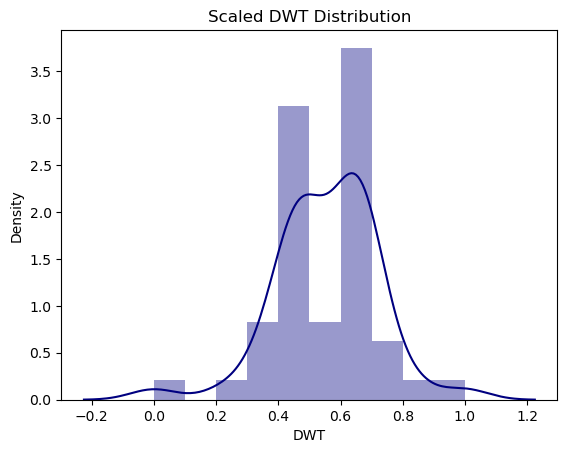

In [64]:
sns.distplot(shipset_standard['DWT'], color = 'navy')
plt.title("Scaled DWT Distribution")

In [65]:
XS = shipset_standard.values[:,:-1] ; Y = shipset_standard.values[:,-1]

In [66]:
XS = sm.add_constant(XS)

In [67]:
ols2 = sm.OLS(Y, XS).fit()

In [68]:
ols2_predictions = ols2.predict(XS)

In [69]:
ols2_residuals = ols2.resid

In [70]:
shipset_regression_results['OLS2_Residuals'] = ols2_residuals

In [71]:
shipset_regression_results['OLS2_Y_predicted'] = ols2_predictions

In [72]:
shipset_regression_results['OLS2_Y_predicted'] = shipset_regression_results['OLS2_Y_predicted']*136 + 22

In [73]:
shipset_regression_results

,Age_at_Sale,DWT,Capesize,Price,LinearReg1_Y_predicted,LinearReg1 Residuals,OLS1_Y_predicted,OLS1_Residuals,OLS2_Residuals,OLS2_Y_predicted
0,8,170.2,4647,73,82.600088,-9.600088,82.600088,-9.600088,-0.070589,82.600088
1,16,150.2,4647,45,41.404262,3.595738,41.404262,3.595738,0.026439,41.404262
2,12,151.1,4647,62,59.801570,2.198430,59.801570,2.198430,0.016165,59.801570
3,12,158.0,4647,60,61.470161,-1.470161,61.470161,-1.470161,-0.010810,61.470161
4,14,174.7,4647,61,56.418800,4.581200,56.418800,4.581200,0.033685,56.418800
5,8,169.9,4878,83,84.192841,-1.192841,84.192841,-1.192841,-0.008771,84.192841
6,17,149.5,4878,45,38.355368,6.644632,38.355368,6.644632,0.048858,38.355368
7,3,170.0,5245,100,109.587344,-9.587344,109.587344,-9.587344,-0.070495,109.587344
8,13,165.3,5245,65,63.001601,1.998399,63.001601,1.998399,0.014694,63.001601
9,11,165.1,5245,70,72.043070,-2.043070,72.043070,-2.043070,-0.015023,72.043070


In [74]:
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     170.5
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           3.07e-24
Time:                        16:55:56   Log-Likelihood:                 59.943
No. Observations:                  48   AIC:                            -111.9
Df Residuals:                      44   BIC:                            -104.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4850      0.054      9.029      0.000       0.377       0.593
x1            -0.7686      0.044    -17.421      0.000      -0.858      -0.680
x2             0.1933      0.073      2.646      0.011       0.046       0.341
x3             0.4152      0.034     12.081      0.000       0.346       0.484
==============================================================================
Omnibus:                       12.722   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.687
Skew:                          -0.828   Prob(JB):                     0.000144
Kurtosis:                       5.470   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Residuals')

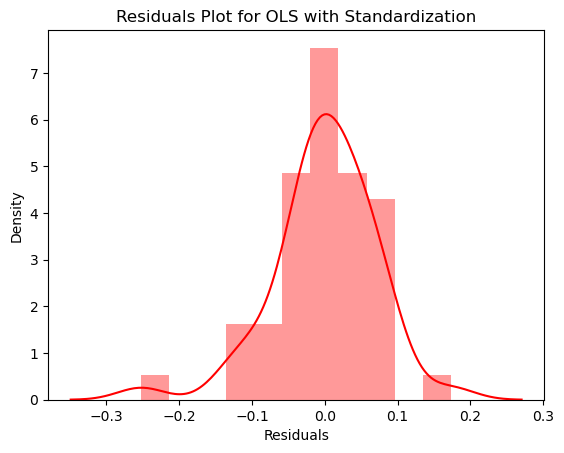

In [75]:
sns.distplot(ols2_residuals, color = 'red')
plt.title("Residuals Plot for OLS with Standardization")
plt.xlabel("Residuals")

(-20.0, 20.0)

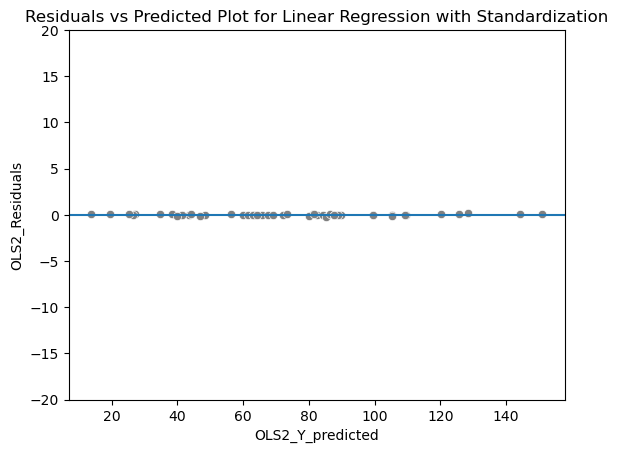

In [76]:
sns.scatterplot(data = shipset_regression_results, x = 'OLS2_Y_predicted' , y = 'OLS2_Residuals', color = 'grey')
plt.title("Residuals vs Predicted Plot for Linear Regression with Standardization")
plt.axhline(y=0)
plt.ylim(-20,20)

In [77]:
print(mean_absolute_error(Y, ols2_predictions))

0.05048667698709952


In [ ]:
# Calculating price with standardized dataset

In [71]:
Price_estimated = 0.4850 + DWT_custom*(0.1933) + Capesize_index*(0.4152) + Age_at_Sale_custom*(-0.7686) ; print("\nEstimated Price of the ship after standardizing is = {0}".format(Price_estimated))


Estimated Price of the ship after standardizing is = 5206.558800000001


# Regression using Synthetic Dataset having 77% Similarity

In [78]:
synth = pd.read_csv("/Users/rakshitmadan/Desktop/STAT 610/Case Study/Synth 77 percent.csv")
synth = synth.drop('SaleDate',axis=1)

In [79]:
synth.drop('Vessel',axis = 1,inplace = True)

Text(0.5, 1.0, 'Age_at_Sale vs Price using Synthetic Data')

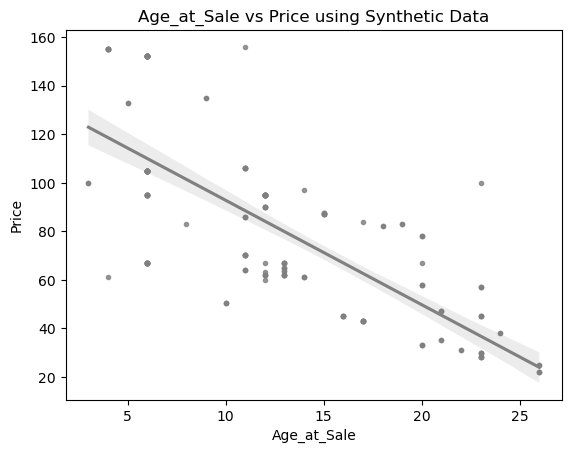

In [80]:
sns.regplot(x = synth['Age_at_Sale'], y = synth['Price'],marker = '.', color = 'grey')
plt.title('Age_at_Sale vs Price using Synthetic Data')

Text(0.5, 1.0, 'DWT vs Price using Synthetic Data')

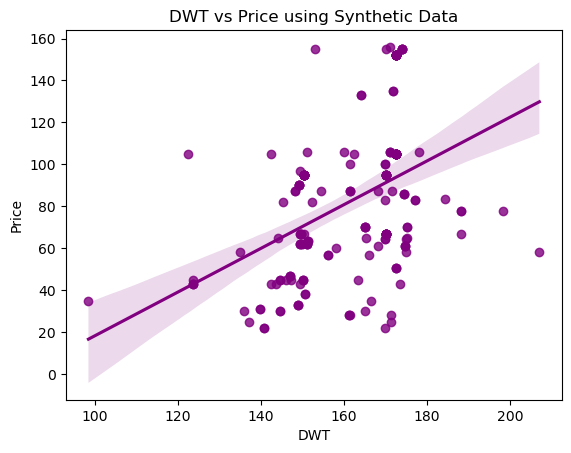

In [56]:
sns.regplot(x = synth['DWT'], y = synth['Price'],marker = 'o', color = 'purple')
plt.title('DWT vs Price using Synthetic Data')

In [81]:
# Correlation Matrix
synth.corr()

,Price,YearBuilt,Age_at_Sale,DWT,Capesize
Price,1.000000,0.759014,-0.745639,0.423295,0.168410
YearBuilt,0.759014,1.000000,-0.998297,0.416077,-0.012604
Age_at_Sale,-0.745639,-0.998297,1.000000,-0.402962,0.029448
DWT,0.423295,0.416077,-0.402962,1.000000,0.140202
Capesize,0.168410,-0.012604,0.029448,0.140202,1.000000


Text(0.5, 1.0, 'Synthetic Data Price Distribution')

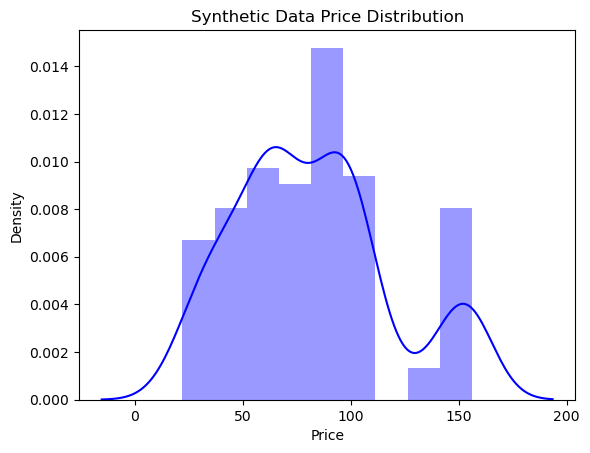

In [58]:
sns.distplot(synth['Price'], color = 'blue')
plt.title("Synthetic Data Price Distribution")

# LR using Original Data as Train Data and Synthetic as Test Data

In [82]:
X_train = shipset_regression.values[:,:-1]
X_train

array([[8.0000e+00, 1.7020e+02, 4.6470e+03],
       [1.6000e+01, 1.5020e+02, 4.6470e+03],
       [1.2000e+01, 1.5110e+02, 4.6470e+03],
       [1.2000e+01, 1.5800e+02, 4.6470e+03],
       [1.4000e+01, 1.7470e+02, 4.6470e+03],
       [8.0000e+00, 1.6990e+02, 4.8780e+03],
       [1.7000e+01, 1.4950e+02, 4.8780e+03],
       [3.0000e+00, 1.7000e+02, 5.2450e+03],
       [1.3000e+01, 1.6530e+02, 5.2450e+03],
       [1.1000e+01, 1.6510e+02, 5.2450e+03],
       [2.0000e+01, 1.4900e+02, 5.2450e+03],
       [1.2000e+01, 1.5800e+02, 5.2450e+03],
       [1.7000e+01, 1.2350e+02, 5.2450e+03],
       [6.0000e+00, 1.7010e+02, 5.7520e+03],
       [6.0000e+00, 1.7010e+02, 5.7520e+03],
       [1.3000e+01, 1.5140e+02, 5.7520e+03],
       [1.2000e+01, 1.5040e+02, 5.7520e+03],
       [1.3000e+01, 1.4980e+02, 5.7520e+03],
       [2.2000e+01, 1.3980e+02, 5.7520e+03],
       [1.1000e+01, 1.7450e+02, 6.2010e+03],
       [1.0000e+01, 1.7260e+02, 6.2010e+03],
       [1.1000e+01, 1.7000e+02, 6.2010e+03],
       [1.

In [83]:
Y_train = shipset_regression.values[:,-1] 
Y_train

array([ 73.,  45.,  62.,  60.,  61.,  83.,  45., 100.,  65.,  70.,  33.,
        63.,  43.,  95.,  95.,  64.,  67.,  62.,  31.,  86.,  51.,  64.,
        67.,  28.,  30., 105.,  22., 133.,  90.,  47.,  45.,  57., 106.,
       152.,  97.,  38.,  88.,  78.,  35.,  84., 155.,  58.,  83.,  25.,
       135., 158.,  87.,  82.])

In [84]:
synth_regression = synth[["Age_at_Sale","DWT","Capesize","Price"]].copy() ; 

In [85]:
X_test = synth_regression.values[:,:-1]; Y_test = synth_regression.values[:,-1]

In [86]:
LR_synth = LinearRegression().fit(X_train, Y_train)

In [87]:
LR_synth_predicted = LR_synth.predict(X_test)

In [88]:
LR_synth.score(X_test,Y_test)

0.0670828832025826

In [89]:
Y_synth_predicted = LR_synth.predict(X_test)

In [90]:
LR_Synth_Residuals = Y_test - Y_synth_predicted

In [147]:
#synthdata_regression['LR_Synth_Predicted Values'] = Y_synth_predicted ; 
#synthdata_regression['LR_Synth_Residuals'] = LR_Synth_Residuals


In [91]:
print(mean_absolute_error(Y_test, Y_synth_predicted)) ; 

print(mean_squared_error(Y_test, Y_synth_predicted))

13.90272523008502
1202.6045056178452


Text(0.5, 0, 'Residuals')

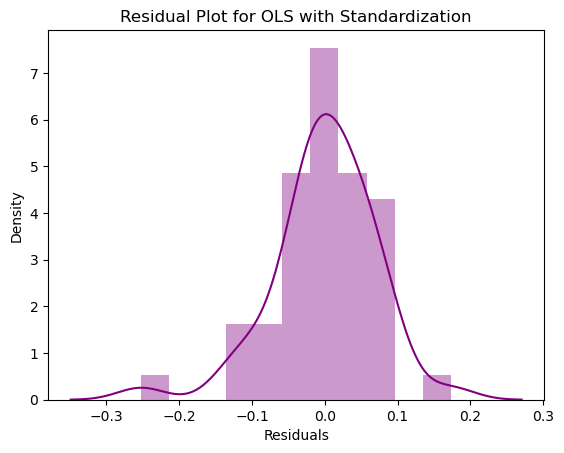

In [92]:
sns.distplot(ols2_residuals, color = 'purple')
plt.title("Residual Plot for OLS with Standardization")
plt.xlabel("Residuals")

In [93]:
m = LR_synth.coef_.flatten() ; b = LR_synth.intercept_.flatten() ; print("m = {0}".format(m)) ; print("b = {0}".format(b))

m = [-4.54491661  0.24182468  0.00720909]
b = [44.30020712]


# OLS by using Original as Train and Synthetic as Test

In [94]:
synth.describe()

,Price,YearBuilt,Age_at_Sale,DWT,Capesize
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,82.121500,1994.650000,12.465000,161.261000,7741.325000
std,35.993853,6.216973,6.236445,14.634103,4522.129027
min,22.000000,1981.000000,3.000000,98.400000,4647.000000
25%,59.500000,1990.000000,6.000000,150.200000,5752.000000
50%,80.000000,1995.000000,12.000000,165.650000,6980.000000
75%,105.000000,2001.000000,17.000000,172.500000,9663.000000
max,156.000000,2004.000000,26.000000,207.100000,63245.000000


In [95]:
Y_synth, X_synth = dmatrices('Price ~ DWT+Age_at_Sale+Capesize', data=synth_regression, return_type='dataframe')

In [96]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_synth.values, i) for i in range(X_synth.shape[1])]
vif['variable'] = X_synth.columns ; vif

,VIF,variable
0,173.042386,Intercept
1,1.227782,DWT
2,1.204693,Age_at_Sale
3,1.029309,Capesize


In [97]:
X_test = sm.add_constant(X_test) ; X_train = sm.add_constant(X_train)

In [98]:
ols_synth = sm.OLS(Y_train, X_train).fit()

In [99]:
predictions_synth = ols_synth.predict(X_test)

In [100]:
print(mean_absolute_error(Y_test, predictions_synth))

13.902725230085299


In [101]:
print(mean_squared_error(Y_test, predictions_synth))

1202.604505617945


In [102]:
ols_synth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     170.5
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           3.07e-24
Time:                        17:09:28   Log-Likelihood:                -175.86
No. Observations:                  48   AIC:                             359.7
Df Residuals:                      44   BIC:                             367.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.3002     16.346      2.710      0.010      11.356      77.244
x1            -4.5449      0.261    -17.421      0.000      -5.071      -4.019
x2             0.2418      0.091      2.646      0.011       0.058       0.426
x3             0.0072      0.001     12.081      0.000       0.006       0.008
==============================================================================
Omnibus:                       12.722   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.687
Skew:                          -0.828   Prob(JB):                     0.000144
Kurtosis:                       5.470   Cond. No.                     9.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Residual Plots for Synthetic Data')

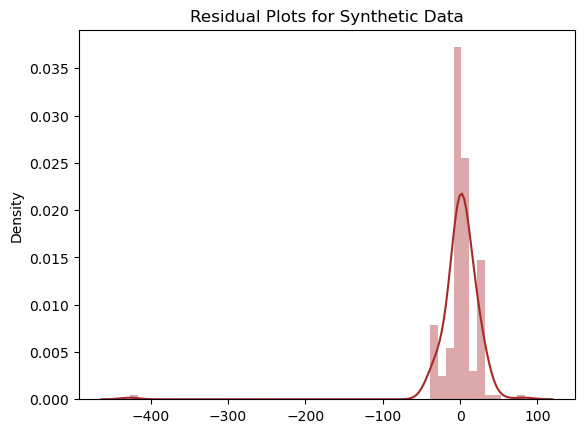

In [103]:
sns.distplot(LR_Synth_Residuals,color = 'brown')
plt.title("Residual Plots for Synthetic Data")

(-75.0, 75.0)

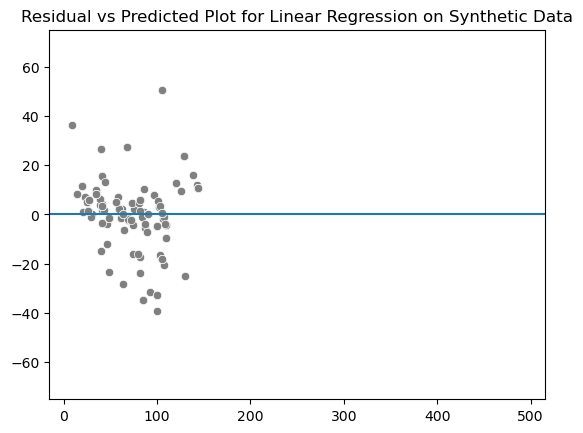

In [104]:
sns.scatterplot(x = predictions_synth , y = LR_Synth_Residuals, color = 'grey')
plt.title("Residual vs Predicted Plot for Linear Regression on Synthetic Data")
plt.axhline(y=0)
plt.ylim(-75,75)